In [108]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [109]:
img = cv2.imread('sunset-5163192_960_720.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])


In [110]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

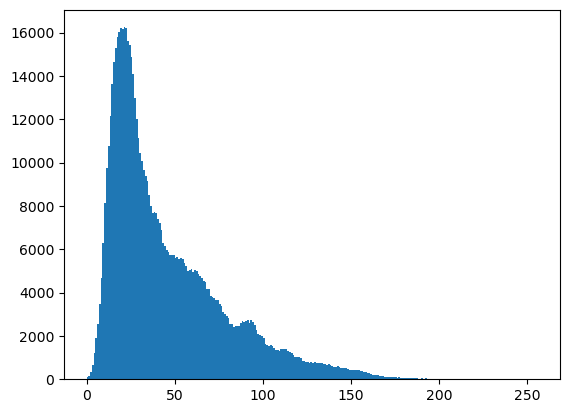

In [111]:
plt.hist(img.ravel(),256,[0,256]); plt.show()


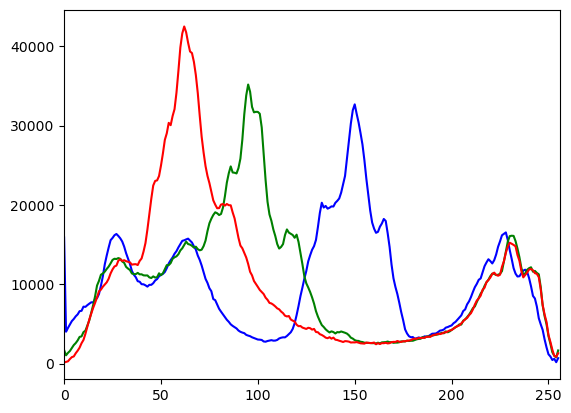

In [112]:
img = cv2.imread('mountain.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


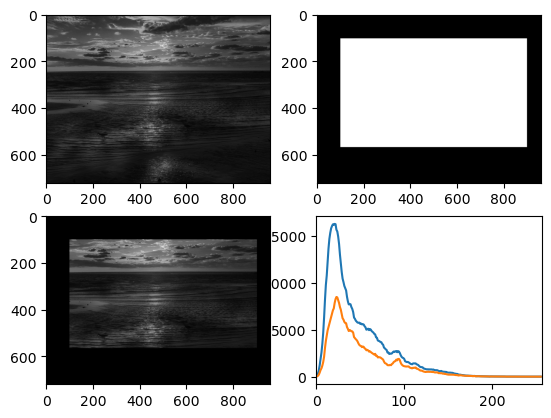

In [113]:
img = cv2.imread('sunset-5163192_960_720.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:566, 100:900] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

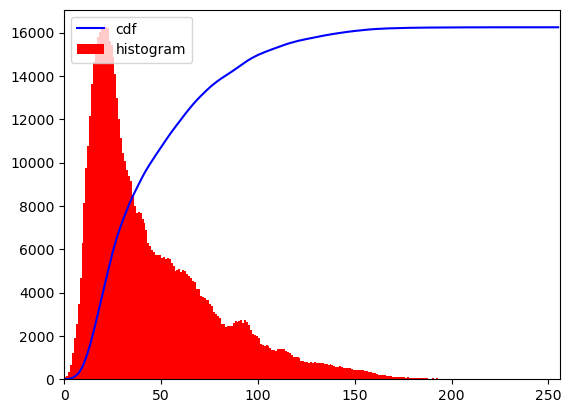

In [114]:
img = cv2.imread('sunset-5163192_960_720.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [115]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')


In [116]:
img2 = cdf[img]

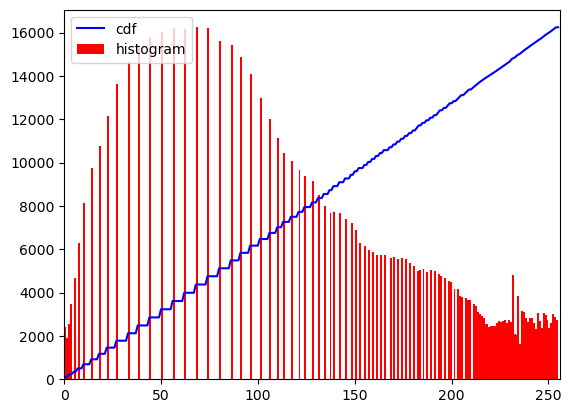

In [117]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

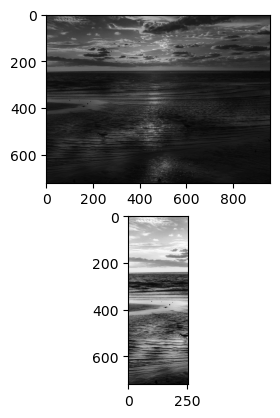

In [118]:
plt.subplot(211), plt.imshow(img, 'gray')
plt.subplot(212), plt.imshow(img2,'gray')
plt.xlim([0,256])
plt.show()

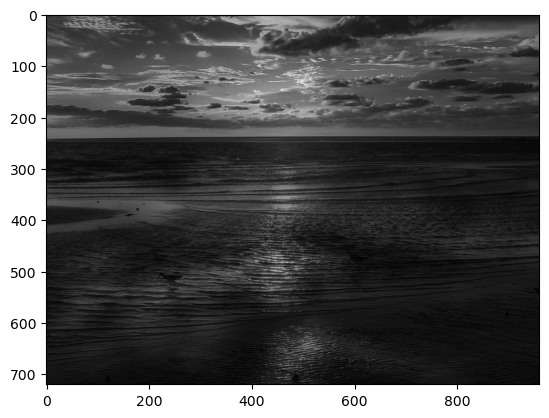

In [119]:
plt.imshow(img,'gray')
plt.show()

In [120]:
img = cv2.imread('mario.png',0)
img2 = img.copy()
template = cv2.imread('mario_coin.png',0)


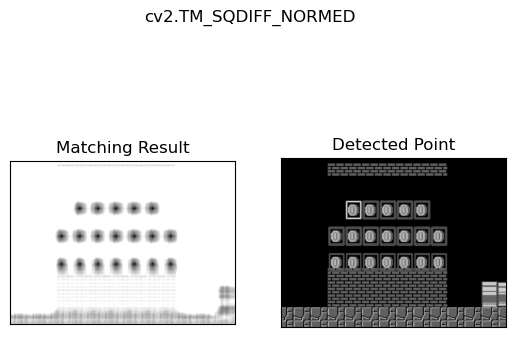

In [121]:
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)
plt.show()


In [122]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

In [123]:
loc = np.where( res >= threshold)

In [124]:
print(loc)

(array([156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 157,
       157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157,
       157, 157, 157, 157, 157, 158, 158, 158, 158, 158, 158, 158, 158,
       158, 158, 158, 158, 248, 248, 248, 248, 248, 248, 248, 248, 248,
       248, 248, 248, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249,
       249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 249, 250,
       250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,
       250, 250, 250, 250, 250, 250, 250, 250, 251, 251, 251, 341, 341,
       341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 342,
       342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342, 342,
       342, 342, 342, 343, 343, 343, 343, 343, 343, 343, 343, 343, 343,
       343], dtype=int64), array([231, 232, 233, 292, 293, 352, 353, 413, 414, 473, 474, 475, 230,
       231, 232, 233, 291, 292, 293, 351, 352, 353, 354, 412, 413, 414,
       415, 472, 473, 474, 475, 231,

In [125]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imwrite('res.png',img_rgb)

True

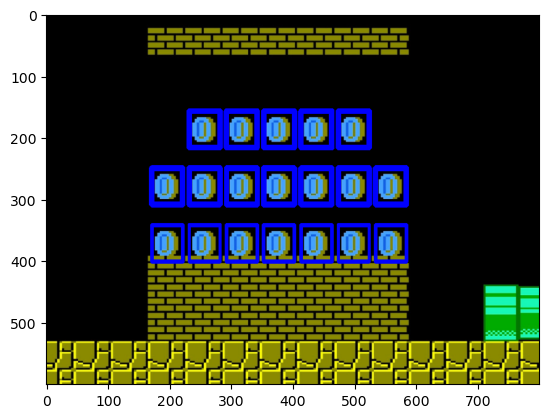

In [126]:
plt.imshow(img_rgb)